In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from copy import deepcopy

from build_solver import build_erg_time_opt_solver
import pickle as pkl

In [2]:
Ns = [100,250,500,1000]

log = {
    'time'  : [],
    'N'     : [],
    'sols'  : []
}

args = {
    'N' : Ns[0], 
    'x0' : np.array([0.11, 0.12, 0., 0.]),
    'xf' : np.array([0.98, 0.97, 0., 0.]),
    'erg_ub' : 0.01,
}

x = np.linspace(args['x0'], args['xf'], args['N'], endpoint=True)
u = np.zeros((args['N'], 2))
init_sol = {'x': x, 'u' : u, 'tf': np.array(10.0)}

solver = build_erg_time_opt_solver(init_sol, args)

for i, N in enumerate(Ns):
    args.update({
        'N' : N,
    })
    # solver.reset()
    x = np.linspace(args['x0'], args['xf'], args['N'], endpoint=True)
    u = np.zeros((args['N'], 2))
    init_sol = {'x': x, 'u' : u, 'tf': np.array(10.0)}
    solver = build_erg_time_opt_solver(init_sol, args)
    solver.solve(args=args, max_iter=5000, eps=1e-8, alpha=1.0001)
    sol = solver.get_solution()
    init_sol = deepcopy(sol)
    log['time'].append(np.array(sol['tf']))
    log['N'].append(N)
    log['sols'].append(sol)
    print(sol['tf'], N)
    # plt.figure(i)
    # plt.plot(sol['x'][:,0], sol['x'][:,1],'g.')
    # plt.plot(sol['x'][:,0], sol['x'][:,1])
    

# plt.show()

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


unsuccessful, tol:  0.25613403
8.671537 100
unsuccessful, tol:  9.7631035
8.838188 250
unsuccessful, tol:  3.0388184
5.4842596 500
unsuccessful, tol:  23.416748
5.163765 1000


100
250
500
1000


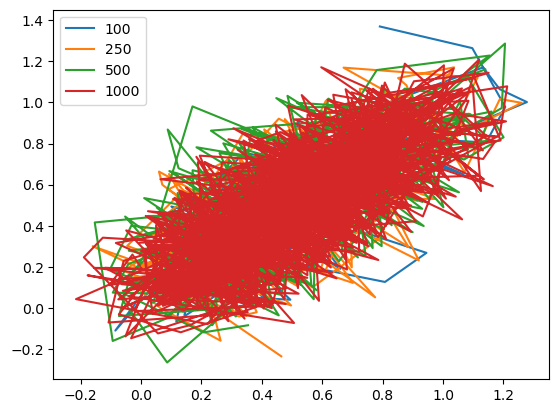

In [3]:
for i,sol in enumerate(log['sols']):
    _x = sol['x']
    print(log['N'][i])
    plt.plot(_x[:,0], _x[:,1], label=log['N'][i])
plt.legend()

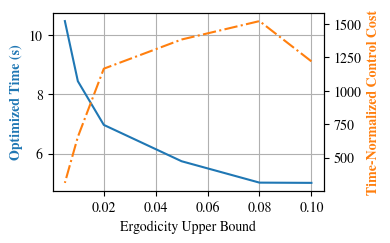

In [30]:
plt.rcParams["font.family"] = "freeserif"

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig, ax1 = plt.subplots(figsize=(4,2.5))


ax1.plot(log['erg_ub'], log['time'], color=colors[0])
# plt.plot(log['time'], ctrl_sat)
ax1.set_xlabel('Ergodicity Upper Bound', fontname='freeserif')
ax1.set_ylabel('Optimized Time (s)', color=colors[0], fontname='freeserif', weight='bold')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(log['erg_ub'], ctrl_sat, color=colors[1], linestyle='-.')
ax2.set_ylabel('Time-Normalized Control Cost', color=colors[1], fontname='freeserif', weight='bold')
plt.tight_layout()
plt.savefig('opt-results.svg')
# plt.show()

In [9]:
log['erg_ub']

[0.1, 0.075, 0.05, 0.02, 0.01, 0.005]

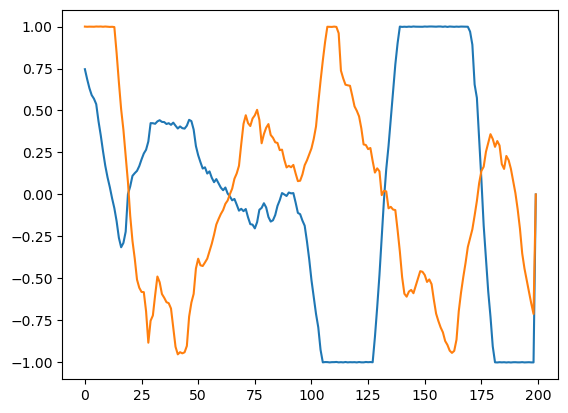

In [45]:
plt.plot(log['sols'][0]['u'])

In [11]:
np.sum(np.square(log['sols'][0]['u'])) * args['N'] / log['sols'][0]['tf']

Array(4487.441, dtype=float32)

In [12]:
erg_ubs[0]

0.1

In [13]:
log['sols'][0]['tf']

Array(3.854123, dtype=float32, weak_type=True)

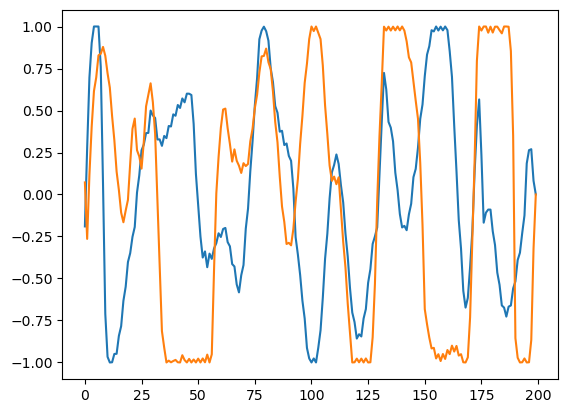

In [46]:
plt.plot(log['sols'][-1]['u'])

In [87]:
np.sum(np.square(log['sols'][-1]['u'])) * args['N'] / log['sols'][-1]['tf']

Array(898.4828, dtype=float32)

In [ ]:
import jax.example_libraries.optimizers